In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import cv2
import time

In [3]:
data_dir = r'G:\Pallav\temp\secy forms snt\computer vision\archive\GenderOcclusionData\Training'
categories = ['male', 'female']

In [4]:
tm = time.time()

data = []
labels = []

for category in categories:
    ctr = 0
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        ctr+=1
        if ctr == 1200:
            break
        
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)
        img_resized = cv2.resize(img_array, (224, 224))
        data.append(img_resized)
        labels.append(class_num)
print(time.time()-tm)

8.930394649505615


Around 200 images/second while loading...

In [5]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
# Data augmentation not needed
"""
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
"""
train_datagen = ImageDataGenerator()


val_datagen = ImageDataGenerator()  # Validation data does not need augmentation


train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


In [10]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0008), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=20
)

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 67s 832ms/step - accuracy: 0.7256 - loss: 0.5344 - val_accuracy: 0.8604 - val_loss: 0.3480
Epoch 2/20
 1/59 ━━━━━━━━━━━━━━━━━━━━ 34s 598ms/step - accuracy: 0.8125 - loss: 0.4734

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8125 - loss: 0.2407 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 759ms/step - accuracy: 0.8747 - loss: 0.3040 - val_accuracy: 0.8771 - val_loss: 0.3345
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.1250 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 752ms/step - accuracy: 0.8954 - loss: 0.2660 - val_accuracy: 0.8667 - val_loss: 0.3246
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9375 - loss: 0.0734 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 750ms/step - accuracy: 0.9242 - loss: 0.2079 - val_accuracy: 0.8687 - val_loss: 0.3321
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.8750 - loss: 0.0950 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 44s 743ms/step - accuracy: 0.9249 - loss: 0.1

In [12]:
# Saving the trained model
model.save(r'G:\Pallav\temp\secy forms snt\computer vision\masked_gender_classification_model_pallav1200imgs8lr.keras')
model.save(r'G:\Pallav\temp\secy forms snt\computer vision\masked_gender_classification_model_pallav1200imgs8lr.h5')

In [13]:
loss, accuracy = model.evaluate(val_generator, steps=len(X_val) // 32)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step - accuracy: 0.8687 - loss: 0.4232
Validation Accuracy: 83.96%


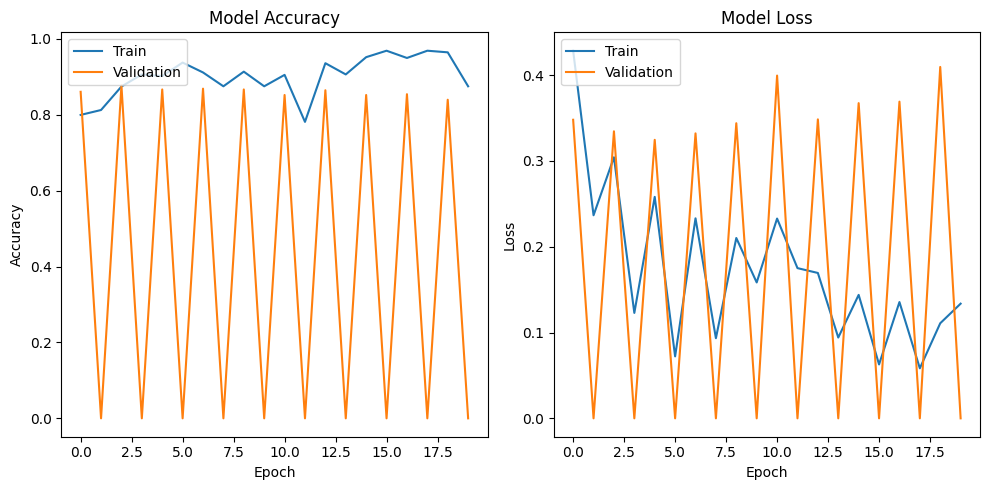

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plotting learning curves
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
#retraining - not saving this due to lower efficiency
history2 = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=4
)
loss, accuracy = model.evaluate(val_generator, steps=len(X_val) // 32)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 682ms/step - accuracy: 0.9716 - loss: 0.0951 - val_accuracy: 0.8667 - val_loss: 0.4047
Epoch 2/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0417 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 682ms/step - accuracy: 0.9771 - loss: 0.0857 - val_accuracy: 0.8625 - val_loss: 0.4838
Epoch 4/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.0544 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.8724 - loss: 0.4071
Validation Accuracy: 86.25%
